In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_player_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

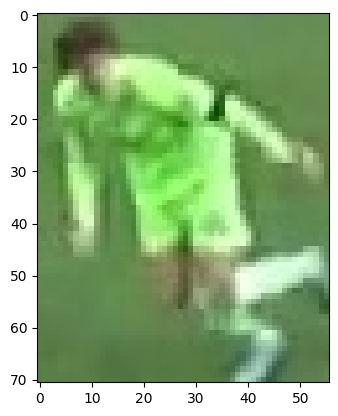

In [4]:
plt.imshow(image)
plt.show()

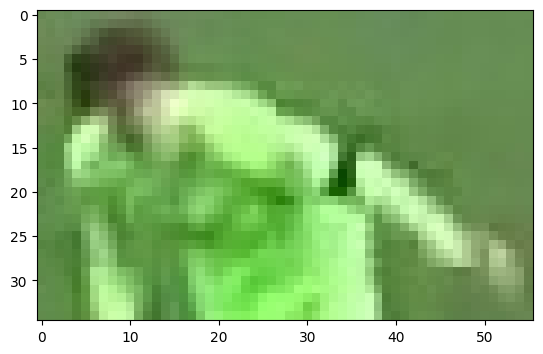

In [6]:
top_half_of_picture = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_of_picture)
plt.show()

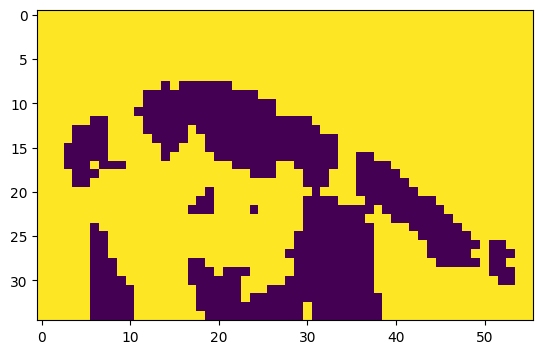

In [13]:
image_2d = top_half_of_picture.reshape(-1,3)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

labels = kmeans.labels_

clustered_image = labels.reshape(top_half_of_picture.shape[0], top_half_of_picture.shape[1])

plt.imshow(clustered_image)
plt.show()

In [14]:
corner_clusters = [ clustered_image[0,0], clustered_image[-1,0], clustered_image[0,-1], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)

In [16]:
player_cluster = 1 - non_player_cluster

kmeans.cluster_centers_[player_cluster]

array([ 98.12619372, 142.99658936,  74.34242838])